In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [51]:
# read highquality user csv into dataframe
ratings = pd.read_csv('highquality_final_merged.csv')
ratings


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,Filtered-Title,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,User-Age-Encoded
0,277427,002542730X,10,politically correct bedtime story modern tale ...,James Finn Garner,1994,John Wiley & Sons Inc,"[1980, 2000)",2660,622,...,politically correct bedtime modern tale life ...,others,others,usa,48,40~60,19,23,6,2
1,277427,0060006641,10,writing well th anniversary classic guide writ...,William Zinsser,2001,HarperResource,"[2000, 2020)",6400,525,...,writing well th anniversary classic guide writ...,others,others,usa,48,40~60,19,23,6,2
2,277427,0060542128,7,storm break,Heather Lowell,2003,HarperTorch,"[2000, 2020)",2330,528,...,storm break,others,others,usa,48,40~60,19,23,6,2
3,277427,0061009059,9,one money stephanie plum novel paperback,Janet Evanovich,1995,HarperTorch,"[1980, 2000)",2766,528,...,one money stephanie plum,others,others,usa,48,40~60,19,23,6,2
4,277427,0152050167,10,whale rider,Witi Ihimaera,2003,Harcourt Paperbacks,"[2000, 2020)",6405,495,...,whale rider,others,others,usa,48,40~60,19,23,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54809,276680,1573221562,10,affinity,Sarah Waters,2000,Riverhead Books,"[2000, 2020)",5578,1003,...,affinity,others,new york,usa,55,40~60,19,18,6,2
54810,276680,1573222038,10,fingersmith,Sarah Waters,2002,Riverhead Hardcover,"[2000, 2020)",5578,1004,...,fingersmith,others,new york,usa,55,40~60,19,18,6,2
54811,276680,1573229083,7,dream,Nuala O'Faolain,2002,Riverhead Books,"[2000, 2020)",4698,1003,...,dream,others,new york,usa,55,40~60,19,18,6,2
54812,276680,1888173408,7,fairy tale common reader edition,Alice Thomas Ellis,2001,Akadine Press,"[2000, 2020)",184,27,...,fairy tale common reader edition,others,new york,usa,55,40~60,19,18,6,2


In [52]:
# further access on missing values
data = ratings.dropna()
data.reset_index(drop=True, inplace=True)

data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,...,Filtered-Title,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded,User-Age-Encoded
0,277427,002542730X,10,politically correct bedtime story modern tale ...,James Finn Garner,1994,John Wiley & Sons Inc,"[1980, 2000)",2660,622,...,politically correct bedtime modern tale life ...,others,others,usa,48,40~60,19,23,6,2
1,277427,0060006641,10,writing well th anniversary classic guide writ...,William Zinsser,2001,HarperResource,"[2000, 2020)",6400,525,...,writing well th anniversary classic guide writ...,others,others,usa,48,40~60,19,23,6,2
2,277427,0060542128,7,storm break,Heather Lowell,2003,HarperTorch,"[2000, 2020)",2330,528,...,storm break,others,others,usa,48,40~60,19,23,6,2
3,277427,0061009059,9,one money stephanie plum novel paperback,Janet Evanovich,1995,HarperTorch,"[1980, 2000)",2766,528,...,one money stephanie plum,others,others,usa,48,40~60,19,23,6,2
4,277427,0152050167,10,whale rider,Witi Ihimaera,2003,Harcourt Paperbacks,"[2000, 2020)",6405,495,...,whale rider,others,others,usa,48,40~60,19,23,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54554,276680,1573221562,10,affinity,Sarah Waters,2000,Riverhead Books,"[2000, 2020)",5578,1003,...,affinity,others,new york,usa,55,40~60,19,18,6,2
54555,276680,1573222038,10,fingersmith,Sarah Waters,2002,Riverhead Hardcover,"[2000, 2020)",5578,1004,...,fingersmith,others,new york,usa,55,40~60,19,18,6,2
54556,276680,1573229083,7,dream,Nuala O'Faolain,2002,Riverhead Books,"[2000, 2020)",4698,1003,...,dream,others,new york,usa,55,40~60,19,18,6,2
54557,276680,1888173408,7,fairy tale common reader edition,Alice Thomas Ellis,2001,Akadine Press,"[2000, 2020)",184,27,...,fairy tale common reader edition,others,new york,usa,55,40~60,19,18,6,2


In [53]:
# Select relevant features
features = data[['User-ID', 'Year-Of-Publication-Bin-Encode', 'Book-Author-Encode', 'Book-Publisher-Encode', 'Book-Rating', 'User-Country_Encoded','User-City_Encoded','User-State_Encoded', 'User-Age-Encoded']]
features


,User-ID,Year-Of-Publication-Bin-Encode,Book-Author-Encode,Book-Publisher-Encode,Book-Rating,User-Country_Encoded,User-City_Encoded,User-State_Encoded,User-Age-Encoded
0,277427,4,2660,622,10,6,19,23,2
1,277427,5,6400,525,10,6,19,23,2
2,277427,5,2330,528,7,6,19,23,2
3,277427,4,2766,528,9,6,19,23,2
4,277427,5,6405,495,10,6,19,23,2
...,...,...,...,...,...,...,...,...,...
54554,276680,5,5578,1003,10,6,19,18,2
54555,276680,5,5578,1004,10,6,19,18,2
54556,276680,5,4698,1003,7,6,19,18,2
54557,276680,5,184,27,7,6,19,18,2


In [54]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

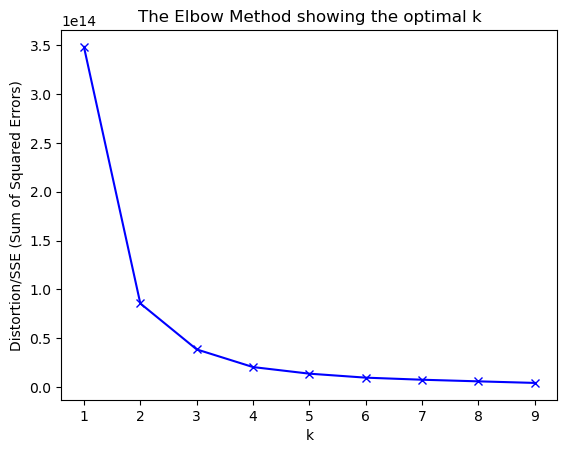

In [55]:
distortions = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_) 
    
plt.plot(k_range, distortions, 'bx-')

plt.title('The Elbow Method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Distortion/SSE (Sum of Squared Errors)')

plt.show()

In [56]:
# Define the range of k
k_values = range(1, 11)  # You can adjust this range based on your specific needs

# Initialize list to store SSE values
sse = []

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Print the SSE values
for k, sse_value in zip(k_values, sse):
    print(f"SSE for k={k}: {sse_value}")

SSE for k=1: 491031.0000000008
SSE for k=2: 446594.80059693125
SSE for k=3: 406538.678688366
SSE for k=4: 368485.3213131953
SSE for k=5: 351206.0522838641
SSE for k=6: 335411.46290021355
SSE for k=7: 308642.10956683184
SSE for k=8: 305099.7577018847
SSE for k=9: 290711.9461329652
SSE for k=10: 274709.6973363203


In [57]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions for plotting
principal_components = pca.fit_transform(features_scaled)

In [58]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

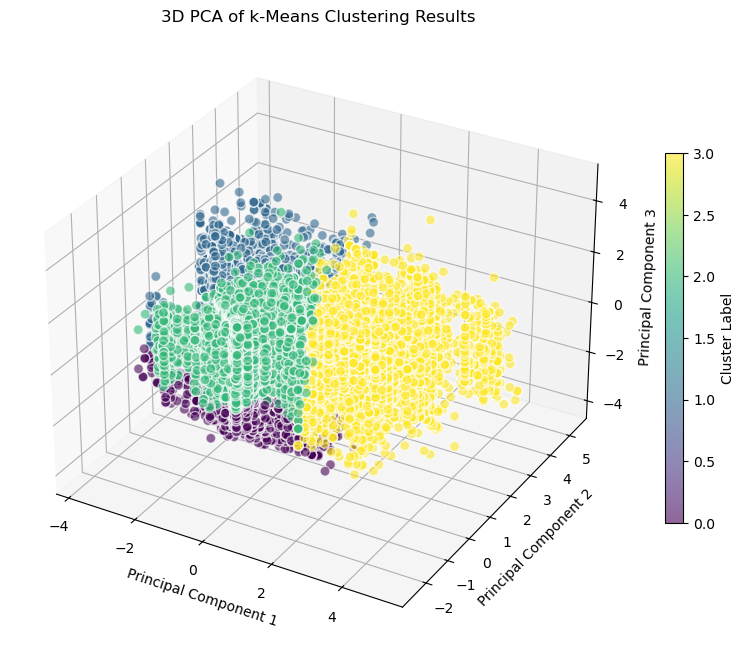

In [59]:
# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], 
                     principal_components[:, 1], 
                     principal_components[:, 2], 
                     c=clusters, cmap='viridis', marker='o', alpha=0.6, edgecolor='w', s=50)

# Axis labeling
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of k-Means Clustering Results')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Cluster Label')

# Show plot
plt.show()

In [60]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
principal_components = pca.fit_transform(features_scaled)

In [61]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

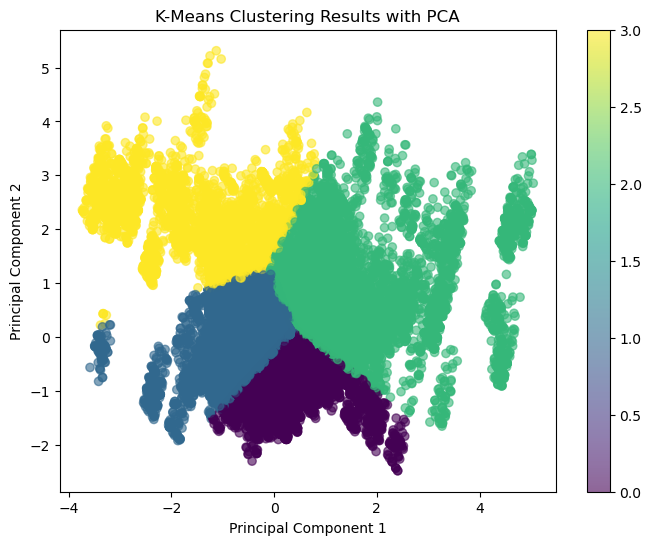

In [62]:
# plot K-Means in 2D 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

In [63]:
# Assign clusters back to the original data
data['Cluster'] = clusters

/var/folders/2y/d2x11n9s4sbc3j2svdb5qdb00000gn/T/ipykernel_31836/1985339526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [64]:
# Aggregating data by clusters
cluster_profiles = data.groupby('Cluster').agg({
    'User-Age-Encoded': 'mean',  
    'User-Country_Encoded': lambda x: x.mode()[0],  
    'User-State_Encoded': lambda x: x.mode()[0],  
    'User-City_Encoded': lambda x: x.mode()[0],  
    'Book-Author-Encode': lambda x: x.mode()[0],  
    'Book-Publisher-Encode': lambda x: x.mode()[0],  
    'Year-Of-Publication-Bin-Encode': lambda x: x.mode()[0], 
    'Book-Rating': 'mean'  
}).rename(columns={
    'User-Age-Encoded': 'age',
    'User-Country_Encoded': 'country_mode',
    'User-City_Encoded': 'city_mode',
    'User-State_Encoded': 'state_mode',
    'Book-Author-Encode': 'favorite_author',
    'Book-Publisher-Encode': 'favorite_publisher',
    'Book-Rating': 'average_rating',
    'Year-Of-Publication-Bin-Encode': 'favorite_publication_year'
})

# Print or output the cluster profiles
print(cluster_profiles)

              age  country_mode  state_mode  city_mode  favorite_author  \
Cluster                                                                   
0        1.989550             6          23         19             5762   
1        1.776051             6          23         19             5762   
2        3.076540             6           5         19             5762   
3        2.021552             1          22         19             5762   

         favorite_publisher  favorite_publication_year  average_rating  
Cluster                                                                 
0                       913                          4        8.527006  
1                       111                          4        7.829568  
2                       111                          4        7.226457  
3                       111                          4        7.422619  


5000


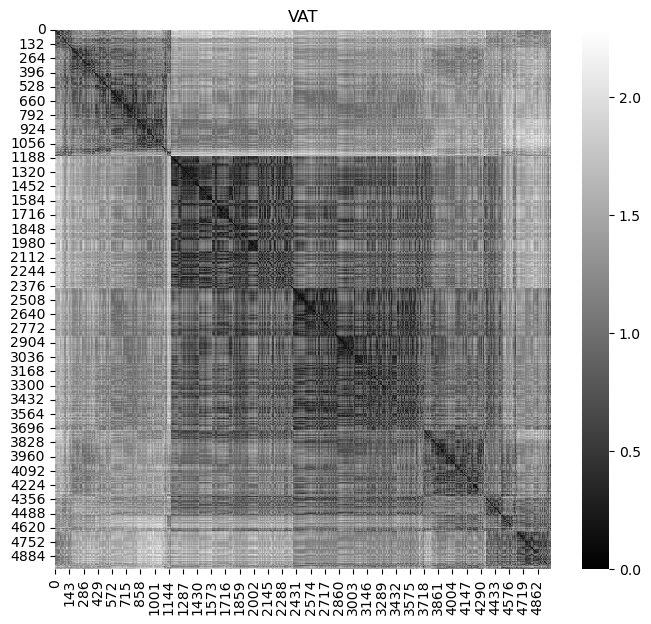

In [25]:
# assessing the clustering tendency of our dataset using VAT (Visual Assessment of clustering Tendency)
# inport necessary algorithm
from vat_graph import VAT
from sklearn.preprocessing import MinMaxScaler

# select only numeric columns
numeric_data = data.select_dtypes(include=[np.number]) 
sampled_data = numeric_data.sample(n=5000, random_state=42)
normalized_data = MinMaxScaler().fit_transform(sampled_data)
pca = PCA(n_components=7)
reduced_data = pca.fit_transform(normalized_data)

# check sampling cquantity
print(len(reduced_data))

# Plot VAT
RV, _, I = VAT(reduced_data) 

plt.figure(figsize=(8, 7))
sns.heatmap(RV, cmap='gray')
plt.title("VAT")

plt.show()
